# CVE Data Wrangler
## Import Libraries

In [118]:
from pandas import read_csv, options, DataFrame
from matplotlib import pyplot as plt, axes

## Wrangling

In [119]:
options.mode.chained_assignment = None

cve_raw = read_csv("./CVE_raw.csv")
cve_filtered = cve_raw[cve_raw["Description"].str.contains("linux|windows", case = False)]
cve_filtered["Year"] = cve_filtered["Name"].str.slice(4, 8)
linux_mask = cve_raw["Description"].str.contains("linux", case = False)
windows_mask = cve_raw["Description"].str.contains("windows", case = False)
cve_filtered.loc[linux_mask, "OS"] = "linux"
cve_filtered.loc[windows_mask, "OS"] = "windows"
years = sorted(cve_filtered["Year"].unique())
count_linux = []
count_windows = []
for year in years:
    for os in ["linux", "windows"]:
        f = (cve_filtered["OS"] == os) & (cve_filtered["Year"] == year)
        count = cve_filtered[f].count()["Year"]
        if os == "linux":
            count_linux.append(count)
        elif os == "windows":
            count_windows.append(count)
os_year = DataFrame({"Year": years, "Linux": count_linux, "Windows": count_windows})
os_year

,Year,Linux,Windows
0,1999,89,137
1,2000,98,61
2,2001,68,87
3,2002,48,126
4,2003,61,84
5,2004,116,104
6,2005,189,148
7,2006,175,220
8,2007,154,289
9,2008,156,208


## Summary

In [120]:
os_year.describe()

,Linux,Windows
count,23.000000,23.000000
mean,200.521739,388.304348
std,128.153271,330.674714
min,48.000000,61.000000
25%,107.000000,142.500000
50%,175.000000,250.000000
75%,234.500000,596.000000
max,579.000000,1147.000000


## Visualisation

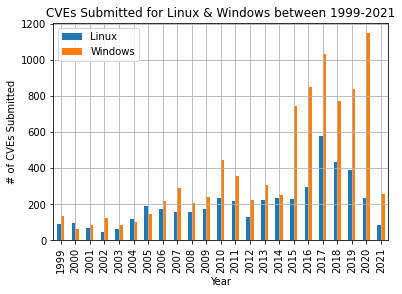

In [121]:
ax: axes.Axes = os_year.plot.bar(x = "Year", y = ["Linux", "Windows"])
ax.set_title("CVEs Submitted for Linux & Windows between 1999-2021")
ax.set_xlabel("Year")
ax.set_ylabel("# of CVEs Submitted")
ax.grid()